<a href="https://colab.research.google.com/github/zzhu104/MAT-421/blob/main/Chapter17%20(17.1%2C17.2%2C17.3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **17. Interpolation Problem Statement**

Assume we have a data set consisting of independent data values, xi, and dependent data values, yi, where i=1,…,n. We would like to find an estimation function y^(x) such that y^(xi)=yi for every point in our data set. This means the estimation function goes through our data points. Given a new x∗, we can interpolate its function value using y^(x∗). In this context, y^(x) is called an interpolation function. The following figure shows the interpolation problem statement.

Unlike regression, interpolation does not require the user to have an underlying model for the data, especially when there are many reliable data points. However, the processes that underly the data must still inform the user about the quality of the interpolation. For example, our data may consist of (x,y) coordinates of a car over time. Since motion is restricted to the maneuvering physics of the car, we can expect that the points between the (x,y) coordinates in our set will be “smooth” rather than jagged.

In the following sections we derive several common interpolation methods.

# **17.2 Linear Interpolation**

In [1]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [2]:
x = [0, 1, 2]
y = [1, 3, 2]

f = interp1d(x, y)
y_hat = f(1.5)
print(y_hat)

2.5


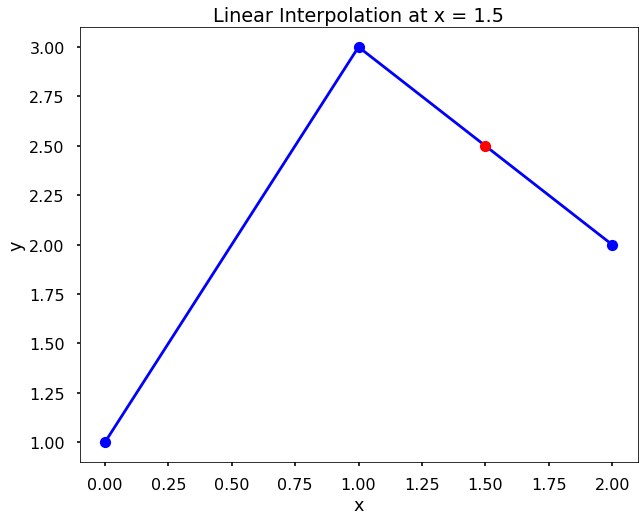

In [3]:
plt.figure(figsize = (10,8))
plt.plot(x, y, '-ob')
plt.plot(1.5, y_hat, 'ro')
plt.title('Linear Interpolation at x = 1.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## **17.3 Cubic Spline Interpolation**

In [4]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [5]:
x = [0, 1, 2]
y = [1, 3, 2]

# use bc_type = 'natural' adds the constraints as we described above
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 2, 100)
y_new = f(x_new)

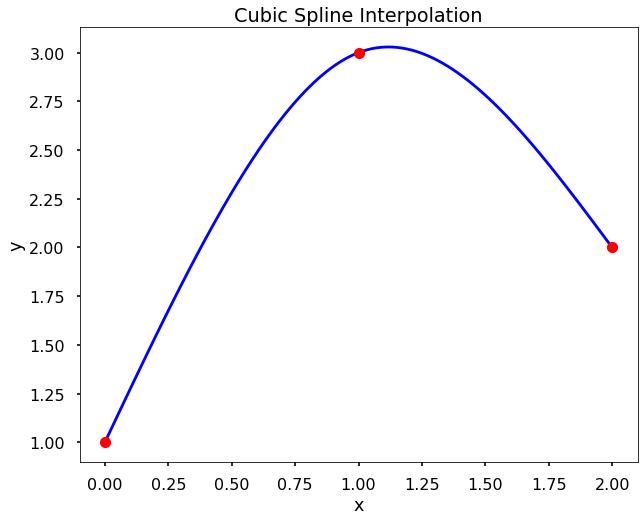

In [6]:
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
b = np.array([1, 3, 3, 2, 0, 0, 0, 0])
b = b[:, np.newaxis]
A = np.array([[0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1], [1, 1, 1, 1, 0, 0, 0, 0], \
             [0, 0, 0, 0, 8, 4, 2, 1], [3, 2, 1, 0, -3, -2, -1, 0], [6, 2, 0, 0, -6, -2, 0, 0],\
             [0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 12, 2, 0, 0]])

In [8]:
np.dot(np.linalg.inv(A), b)

array([[-0.75],
       [ 0.  ],
       [ 2.75],
       [ 1.  ],
       [ 0.75],
       [-4.5 ],
       [ 7.25],
       [-0.5 ]])